## Specs Detail

In [ ]:
import os
import psutil
import torch

# CPU Model
cpu_info = !lscpu | grep "Model name"
print(f"CPU: {cpu_info[0]}")

# Number of CPU Cores
# physical_cores = psutil.cpu_count(logical=False)
# logical_cores = psutil.cpu_count(logical=True)
# print(f"CPU Cores: {physical_cores} physical, {logical_cores} logical")

# Total RAM
ram = psutil.virtual_memory()
print(f"Total RAM: {ram.total / 1e9:.2f} GB")

# Disk Space
disk = psutil.disk_usage('/')
print(f"Disk Space: {disk.total / 1e9:.2f} GB")

# GPU Details
gpu_name = !nvidia-smi --query-gpu=name --format=csv,noheader
if torch.cuda.is_available():
    device_id = torch.cuda.current_device()  # Get current CUDA device index
    print(f"CUDA Device ID: {device_id}")
    print(f"CUDA Available: {torch.cuda.is_available()}")
    print(f"CUDA Version: {torch.version.cuda}")
else:
    print("No GPU found.")

print(pyth)

CPU: Model name:                           Intel(R) Xeon(R) CPU @ 2.20GHz
Total RAM: 13.61 GB
Disk Space: 115.66 GB
No GPU found.


In [ ]:
!python --version

Python 3.11.12


## Drive connect

Download Datasets and Basic Analyzing


In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/datasets'


/content/drive/MyDrive/datasets


In [ ]:
%ls

 advs7235-sup-0001-suppmat.csv   llama2_finetune/
 advs7235-sup-0002-suppmat.csv   mc_dataset.jsonl
 advs7235-sup-0003-suppmat.csv   mc_formatted.json
 base_acc_df.csv                 qa_dataset.jsonl
 base_acc_manual.gsheet          rag_acc_df.csv
 bio_acc_df.csv                  rag_acc_df_two.csv
 bio_acc_manual.gsheet           rag_acc_df_two.gsheet
 chroma_db/                      rag_acc_manual.gsheet
 docs_cleaned_eight.json         rag_chroma_db/
 docs_cleaned_nine.json          rag_eval/
 docs_cleaned_seven.json        'rag_final (1).gsheet'
 docs.json                       rag_final.csv
 documents_doi.json              rag_final.gsheet
 documents_final.json            wandb/
 index/


## Dataset #1

In [ ]:

import pandas as pd
import numpy as np

d1_path = "/content/drive/MyDrive/datasets/advs7235-sup-0001-suppmat.csv"

d1 = pd.read_csv(d1_path)
d1.head()

,DOI,Article Title,Authors,Author Full Names,Source Title,Book Series Title,Book Series Subtitle,Document Type,Conference Title,Conference Date,...,Publication Year,Volume,Issue,Start Page,End Page,Article Number,Unnamed: 30,DOI Link,Book DOI,Open Access Designations
0,10.4028/www.scientific.net/KEM.522.117,Fabrication of 3D Hierarchical Scaffolds by a ...,"Yu, YZ; Han, ZZ; Liu, Y; Fang, SH; Liu, YY; Hu...","Yu, Yongze; Han, Zhenzhong; Liu, Ying; Fang, S...",PROGRESS IN ADVANCED MANUFACTURING TECHNOLOGIES,Key Engineering Materials,NaN,Article; Book Chapter,NaN,NaN,...,2012,522,NaN,117,122,NaN,NaN,http://dx.doi.org/10.1109/ICMA.2009.5246542,NaN,NaN
1,10.4028/www.scientific.net/AMM.461.305,Surface texture and mechanical behavior of cla...,"Yang, ZX; Liu, ZH; Dai, ZD","Yang, ZhiXian; Liu, ZeHua; Dai, ZhenDong",ADVANCES IN BIONIC ENGINEERING,Applied Mechanics and Materials,NaN,Proceedings Paper,4th International Conference of Bionic Enginee...,"AUG 13-16, 2013",...,2014,461,NaN,305,+,NaN,NaN,NaN,NaN,NaN
2,10.3791/54201,Characterizing Multiscale Mechanical Propertie...,"Canovic, EP; Qing, B; Mijailovic, AS; Jagielsk...","Canovic, Elizabeth Peruski; Qing, Bo; Mijailov...",JOVE-JOURNAL OF VISUALIZED EXPERIMENTS,NaN,NaN,Article,NaN,NaN,...,2016,NaN,115,NaN,NaN,e54201,NaN,http://dx.doi.org/10.1109/MEMS51782.2021.9375403,NaN,NaN
3,10.3791/51535,Characterization Of Multi-layered Fish Scales ...,"Allison, PG; Rodriguez, RI; Moser, RD; William...","Allison, Paul G.; Rodriguez, Rogie I.; Moser, ...",JOVE-JOURNAL OF VISUALIZED EXPERIMENTS,NaN,NaN,Article,NaN,NaN,...,2014,NaN,89,NaN,NaN,e51535,NaN,NaN,NaN,NaN
4,10.3762/bjnano.9.229,Evidence of friction reduction in laterally gr...,"Guarino, R; Costagliola, G; Bosia, F; Pugno, NM","Guarino, Roberto; Costagliola, Gianluca; Bosia...",BEILSTEIN JOURNAL OF NANOTECHNOLOGY,NaN,NaN,Article,NaN,NaN,...,2018,9,NaN,2443,2456,NaN,NaN,NaN,NaN,NaN


In [ ]:
d1.describe()

,Book Series Subtitle,Publication Year,Unnamed: 30
count,0.0,1034.000000,0.0
mean,NaN,2016.584139,NaN
std,NaN,4.813781,NaN
min,NaN,1995.000000,NaN
25%,NaN,2014.000000,NaN
50%,NaN,2017.000000,NaN
75%,NaN,2021.000000,NaN
max,NaN,2023.000000,NaN


In [ ]:
d1.isnull().sum()

,0
DOI,33
Article Title,0
Authors,1
Author Full Names,1
Source Title,2
Book Series Title,980
Book Series Subtitle,1034
Document Type,0
Conference Title,978
Conference Date,978


In [ ]:
pip install requests pandas tools


In [ ]:
!pip install pymupdf
!pip install --upgrade pymupdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 61.6 MB/s eta 0:00:00


In [ ]:
pip install pdf2image pytesseract


In [ ]:
import fitz
print(dir(fitz))

['ASSERT_PDF', 'Annot', 'AnyType', 'Archive', 'Base14_fontdict', 'Base14_fontnames', 'ByteString', 'CS_CMYK', 'CS_GRAY', 'CS_RGB', 'CheckColor', 'CheckFont', 'CheckFontInfo', 'CheckMarkerArg', 'CheckMorph', 'CheckParent', 'CheckQuad', 'CheckRect', 'ColorCode', 'Colorspace', 'ConversionHeader', 'ConversionTrailer', 'DeviceWrapper', 'DisplayList', 'Document', 'DocumentWriter', 'EMPTY_IRECT', 'EMPTY_QUAD', 'EMPTY_RECT', 'ENSURE_OPERATION', 'EPSILON', 'ElementPosition', 'EmptyFileError', 'FLT_EPSILON', 'FZ_MAX_INF_RECT', 'FZ_MIN_INF_RECT', 'FileDataError', 'FileNotFoundError', 'FitzDeprecation', 'Font', 'Graftmap', 'INFINITE_IRECT', 'INFINITE_QUAD', 'INFINITE_RECT', 'INVALID_NAME_CHARS', 'IRect', 'Identity', 'IdentityMatrix', 'JM_BinFromBuffer', 'JM_BufferFromBytes', 'JM_EscapeStrFromBuffer', 'JM_EscapeStrFromStr', 'JM_Exc_FileDataError', 'JM_FLOAT_ITEM', 'JM_INT_ITEM', 'JM_MEMORY', 'JM_StrAsChar', 'JM_TUPLE', 'JM_TUPLE3', 'JM_UnicodeFromBuffer', 'JM_UnicodeFromStr', 'JM_add_annot_id', 'JM

In [ ]:
print(len(d1))
print(len(d1.columns))
print(d1.columns)

1034
34
Index(['DOI', 'Article Title', 'Authors', 'Author Full Names', 'Source Title',
       'Book Series Title', 'Book Series Subtitle', 'Document Type',
       'Conference Title', 'Conference Date', 'Conference Location',
       'Conference Sponsor', 'Conference Host', 'Author Keywords',
       'Keywords Plus', 'Publisher', 'Publisher City', 'Publisher Address',
       'ISSN', 'eISSN', 'ISBN', 'Journal Abbreviation',
       'Journal ISO Abbreviation', 'Publication Date', 'Publication Year',
       'Volume', 'Issue', 'Start Page', 'End Page', 'Article Number',
       'Unnamed: 30', 'DOI Link', 'Book DOI', 'Open Access Designations'],
      dtype='object')


Fetch Abstract text from DOIs using Unpaywall or Crossref API to get open-access full text or abstract.

In [ ]:
import pandas as pd
import requests
from time import sleep
import fitz  # PyMuPDF
import re
from bs4 import BeautifulSoup

import pytesseract
from pdf2image import convert_from_path

patterns = [
    r'https?://\S+',    # Remove URLs
    r'\bdoi\b[\w\./:]+', # Remove DOI patterns
    r'\b(Copyright|Ltd|Company|All Rights Reserved|Trademark)\b.*', # Remove copyright, Ltd, etc.
    r'[^\w\s]', # Remove non-alphanumeric symbols
    r"\s+", # whitespace
]


def crop_text(text):
    # Find the first occurrence of 'Introduction' and the last occurrence of 'References', 'Acknowledgements', etc.
    start_index = re.search(r'\bIntroduction\b', text)
    end_index = re.search(r'\b(?:References|Acknowledgements|Conflicts of Interest)\b', text)

    # Ensure the keywords exist and crop the text
    if start_index and end_index:
        text = text[start_index.start():end_index.end()]
    return text




def clean_text(text):
    if not text:
        return ""

    # Remove HTML tags (for Crossref abstract)
    text = BeautifulSoup(text, "html.parser").get_text()
    text = crop_text(text)

    # Remove URLs
    for pattern in patterns:
      text = re.sub(pattern, ' ', text)

    # Remove page numbers, headers/footers (common artifacts)
    lines = text.splitlines()
    cleaned_lines = []
    for line in lines:
        line = line.strip()
        if not line:
            continue


        if re.match(r"^Page\s*\d+$", line) or len(line) < 5:
            continue
        cleaned_lines.append(line)

    return " ".join(cleaned_lines)


def get_open_access_url(doi):
    url = f"https://api.unpaywall.org/v2/{doi}?email=sharon.nemekhbayar1009@gmail.com"
    try:
        res = requests.get(url)
        data = res.json()
        return data.get("best_oa_location", {}).get("url_for_pdf") or \
               data.get("best_oa_location", {}).get("url")
    except:
        return None

def get_crossref_abstract(doi):
    url = f"https://api.crossref.org/works/{doi}"
    try:
        res = requests.get(url)
        data = res.json()
        return data["message"].get("abstract")
    except:
        return None


def extract_text_from_pdf_url(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with fitz.open(stream=response.content, filetype="pdf") as doc:
                text = ""
                is_scanned_pdf = False
                for page in doc:
                    page_text = page.get_text()
                    if not page_text.strip():
                        is_scanned_pdf = True
                    text += page_text

                if text.strip() == "" and is_scanned_pdf:
                    # If no text is found and it's a scanned PDF, use OCR to extract text
                    images = convert_from_path(url)
                    text = ""
                    for image in images:
                        text += pytesseract.image_to_string(image)
                return text
    except Exception as e:
        print("PDF extraction failed:", e)
    return None



df = d1.copy()
full = 0
abs = 0

for i, row in df.iterrows():
    doi = str(row["DOI"]).strip()
    if doi == "nan" or not doi or doi in processed_dois:
        continue

    # Unpaywall for full text
    full_text_url = get_open_access_url(doi)
    if full_text_url:
        pdf_text = extract_text_from_pdf_url(full_text_url)
        if pdf_text:
            cleaned = clean_text(pdf_text)
            docs.append({"text": cleaned, "metadata": row.to_dict()})
            print(f"[{i}] Full text extracted and cleaned.")
            full += 1
            continue

    abstract = get_crossref_abstract(doi)
    if abstract:
        cleaned = clean_text(abstract)
        docs.append({"text": cleaned, "metadata": row.to_dict()})
        print(f"[{i}] Abstract fetched and cleaned.")
        abs += 1
    else:
        print(f"[{i}] Nothing found for DOI: {doi}")

    sleep(1)

print(f"✅ Full texts added: {full}")
print(f"📄 Abstracts added: {abs}")
print(f"📚 Total new documents added: {full + abs}")


ModuleNotFoundError: No module named 'fitz'

In [ ]:
len(docs)


460

In [ ]:
processed_dois = {entry["metadata"]["DOI"].strip().lower() for entry in docs if "DOI" in entry["metadata"]}
processed_dois

{'10.1002/adem.201080065',
 '10.1002/adem.201080131',
 '10.1002/adem.201400085',
 '10.1002/adem.201800722',
 '10.1002/adem.201901541',
 '10.1002/adem.202000006',
 '10.1002/adem.202101027',
 '10.1002/adfm.201002030',
 '10.1002/adfm.201100275',
 '10.1002/adfm.201100443',
 '10.1002/adfm.201300053',
 '10.1002/adfm.201503971',
 '10.1002/adfm.201601476',
 '10.1002/adfm.201603826',
 '10.1002/adfm.201701939',
 '10.1002/adfm.201804510',
 '10.1002/adfm.201808518',
 '10.1002/adfm.201905309',
 '10.1002/adfm.201905808',
 '10.1002/adfm.201908121',
 '10.1002/adfm.201910425',
 '10.1002/adfm.202000400',
 '10.1002/adfm.202003528',
 '10.1002/adfm.202003550',
 '10.1002/adfm.202008278',
 '10.1002/adfm.202106468',
 '10.1002/adfm.202205309',
 '10.1002/adfm.202210224',
 '10.1002/adhm.201500070',
 '10.1002/adhm.201901552',
 '10.1002/adhm.202000208',
 '10.1002/adhm.202200287',
 '10.1002/adhm.202202766',
 '10.1002/adma.200701286',
 '10.1002/adma.200801219',
 '10.1002/adma.201201471',
 '10.1002/adma.201202713',
 

## Clean the fetched texts

In [ ]:
import json

documents = json.load(open("documents.json"))



In [ ]:
import re
from bs4 import BeautifulSoup
import unicodedata

def normalize_unicode_ligatures(text):
    return unicodedata.normalize("NFKD", text)

patterns = [
    r'\bdoi\b[\w\./:]+',  # DOI patterns
    r'\(\s*(et al\.,?|[A-Z][a-z]+[^)]*\d{4})\s*\)',  # Citations like (Smith et al., 2021)
    r'^\s*Figure\s*\d+[a-zA-Z]?[.:]?\s*(shows|illustrates|depicts|demonstrates|explains|describes|represents)\s*[:]*\s*',
    r'\[\s*\d{1,3}(?:[\s,–-]*\d{1,3})*\s*\]',  # citation references like [24–29,46,53,54]
    r'\[.*?\.(avi|mp4|pdf|docx|zip|pptx|xls|xlsx|txt)\]',  # file references
    r'\b([A-Za-z\s]+\.?\s?\d{4},\s?\d+,\s?[\d\-–,]+(?:\.\s?\d+)?)\b',  # journal references
    r'https?://\S+',  # Remove full URLs
    r'\b(?:www|https?)\.[\w\.-]+\.\w+\b',  # domain names
    r':\/\/\s*:\/{2,}',  # malformed URL
    r'/journal/\s*\d+\s*of\s*\d+',  # journal path patterns
    r'\s+',  # Collapse whitespace
    r'\(?(Fig(?:ure)?\s*\d*[a-zA-Z]?)\)?',        # (Fig 3.a), (Figure a), Figure b
    r'\(?(appendix\s*\d+(?:\.\d+)?)\)?',          # (appendix 1.2), appendix 2.1
    r'Figure\s+[a-zA-Z]',                         # Figure a, Figure b
    r'\(Fig\s+[a-zA-Z]\)',                        # (Fig a), (Fig B)
]



keywords = [
    "Acknowledgement", "Acknowledgements", "ACKNOWLEDGMENTS", "Acknowledgment", "Acknowledgments", "ACKNOWLEDGEMENTS",
    "Conflict of Interest", "Conflicts of Interest",
    "Supporting Information", "Funding", "Author Contributions",
    "Ethics", "Abbreviations", "Data Availability",
    "ORCID", "Consent", "Supplementary Material", "References", "Reference"
]

# Crop full text to useful section only
def crop_text(text):
    start = re.search(r'\bIntroduction\b', text, re.IGNORECASE)
    end = re.search(r'\b(References|Acknowledgements|Conflicts of Interest|Supporting Information|supplementary)\b', text[::-1], re.IGNORECASE)

    start_idx = start.start() if start else 0
    end_idx = end.start() if end else len(text)

    return text[start_idx:end_idx]

# Main cleaner
def clean_text(text):
    if not text:
        return ""

    # Remove HTML if present (e.g., in Crossref abstracts)
    text = BeautifulSoup(text, "html.parser").get_text()

    # Crop to core content
    text = crop_text(text)

    # Apply all regex patterns
    for pattern in patterns:
        text = re.sub(pattern, ' ', text)

    for k in keywords:
        p = rf"{k}[:\[\]\-]?\s*[\s\S]*?$"
        text = re.sub(p, "", text)

    # Remove hyphenation artifacts (e.g., "bio-\nchemical" => "biochemical")
    text = re.sub(r'-\s+', '', text)
    # Fix hyphenated line breaks (e.g., "den-\nsity" → "density")
    text = re.sub(r'(\w+)-\s*\n\s*(\w+)', r'\1\2', text)
    text = text.replace('\n', ' ')

    # Line-by-line cleanup
    lines = text.splitlines()
    cleaned_lines = []
    for line in lines:
        line = line.strip()
        if not line:
            continue
        if re.match(r'^Page\s*\d+(\sof\s*\d+)?$', line, re.IGNORECASE):
            continue
        if len(line) < 5:
            continue
        cleaned_lines.append(line)


    text = normalize_unicode_ligatures(text)

    # Final normalization
    return re.sub(r'\s+', ' ', ' '.join(cleaned_lines)).strip()


In [ ]:
for n in nine:
      n['text'] = clean_text(n['text'])


In [ ]:
import json

with open("documents.json", "w", encoding="utf-8") as f:
    json.dump(nine, f, ensure_ascii=False, indent=2)


In [ ]:
essential_keys = [
    "DOI", "Article Title", "Authors",
    "Source Title", "Publication Year", "Volume", "Start Page",
    "End Page", "Document Type", "Author Keywords"
]

cleaned_docs_eight = []

for doc in docs:
    cleaned_text = clean_text(doc["text"])
    if len(cleaned_text) < 50:
        continue
    cleaned_metadata = {
        key: doc["metadata"].get(key)
        for key in essential_keys
        if key in doc["metadata"] and pd.notna(doc["metadata"][key])
    }

    cleaned_docs_eight.append({
        "text": cleaned_text,
        "metadata": cleaned_metadata
    })


cleaned_docs_five is deemed to be the best of all, so saved as docs.json

In [ ]:
documents[3]

{'text': 'Introduction Materials with a gradient in their physical or elastic properties are widely found in nature. Several known biological systems have developed specialized functionalities due to stiffness, density or composition gradients. Beetles, for instance, display setae with a graded stiffness that optimises the adhesive performance on rough surfaces . Hardness and stiffness gradients are of fundamental importance in the biomechanics of contacts, since they allow increased resistance against wear, impact, penetration and crack propagation . Bio-inspired solutions have thus been proposed for the design of advanced materials that mimic the hierarchical and graded structures found in nature, for use in engineering applications . Beilstein J. Functionally graded materials (FGMs) display a gradient in their elastic properties along one or more directions and have recently acquired great interest in technology . Several authors have studied standard solid mechanics problems consid

In [ ]:
'Conclusion' in documents[3]['text']

True

In [ ]:
import json

with open("docs_cleaned_eight.json", "w") as f:
    json.dump(documents, f, ensure_ascii=False, indent=2)

In [ ]:
len(documents)

453

In [ ]:
checks = {
    "dangling_references": r'\[\s*\d+([–,-]\s*\d+)*(,\s*\d+)*\s*\]',
    "broken_words": r'\b\w{1,2}\s+\w{1,2}\b',
    "file_links": r'\.(pdf|avi|mp4|zip|docx|pptx|xlsx|txt)',
    "journals_left": r'/journal/|https?://',
    "supporting_info": r'Supporting Information',
    "acknowledgments": r'Acknowledg?ments?:',
    "conflicts_of_interest": r'Conflicts of Interest',
    "weird_punctuation": r'[^\w\s\.,:;()\-–—]',
    "page_numbers": r'\b\d+\s+of\s+\d+\b',
}
for doc in documents:
    text = doc["text"]
    for label, pattern in checks.items():
        matches = re.findall(pattern, text, re.IGNORECASE)
        if matches:
            print(f"{label} found: {matches[:3]}")


broken_words found: ['is to', 'in a', 'by a']
broken_words found: ['It is', 'of an', 'is an']
weird_punctuation found: ['±', '±']
broken_words found: ['E on', 'of Pa', 'of a']
broken_words found: ['it is', 'of a', 'to 2D']
weird_punctuation found: ['’', '’', '=']
broken_words found: ['by a', 'is a', 'On a']
weird_punctuation found: ['“', '”', '’']
broken_words found: ['is a', 'by a']
weird_punctuation found: ['“', '”', '‐']
broken_words found: ['is a', 'of 95', '25 MP']
supporting_info found: ['supporting information', 'supporting information', 'supporting information']
weird_punctuation found: ['%', '%', '·']
page_numbers found: ['3 of 11', '4 of 11', '5 of 11']
broken_words found: ['It is', 'is an', 'to a']
weird_punctuation found: ['/', '/', '%']
broken_words found: ['is to', '2 of', 'as a']
weird_punctuation found: ['’', '’', '/']
page_numbers found: ['2 of 39', '3 of 39', '4 of 39']
broken_words found: ['in a', 'of a', 'of a']
weird_punctuation found: ['“', '”', '/']
page_numbers 

## Analyzing evaluation

#### biorag_eval

In [ ]:
import pandas as pd

rag_df = pd.read_csv('rag_eval/rag_final.csv')
rag_df.head(3)

,question,full_response,predicted,ground_truth,category
0,"When describing gradient structures, they can ...",Context:\n as long as the structu...,C,C,General
1,What is the structure found in many crustacean...,Context:\n The Bouligand structur...,B,B,General
2,What is scanning electron microscopy used for?...,Context:\n and mechanical tests. ...,A,A,General


In [ ]:
is_correct = rag_df['ground_truth'] == rag_df['predicted']
is_correct.sum()

np.int64(83)

In [ ]:
rag_df['is_correct'] = is_correct
rag_df.groupby('category')['is_correct'].value_counts()

category   is_correct
General    True          37
           False          3
Non-Bio    True          10
Numerical  True           8
           False          2
Specific   True          28
           False         12
Name: count, dtype: int64

#### biollm_eval

In [ ]:
import pandas as pd

bio = pd.read_csv('rag_eval/bio.csv')
is_correct_bio = bio['ground_truth'] == bio['answer']
is_correct_bio.sum()

np.int64(67)

In [ ]:
bio['is_correct'] = is_correct_bio
bio.groupby('category')['is_correct'].value_counts()

category   is_correct
General    True          29
           False         11
Non-Bio    True           8
           False          2
Numerical  False          6
           True           4
Specific   True          26
           False         14
Name: count, dtype: int64

#### basemodel_eval

In [ ]:
base = pd.read_csv('rag_eval/base.csv')
is_correct_base = base['ground_truth'] == base['answer']


base['is_correct'] = is_correct_base
base.groupby('category')['is_correct'].value_counts()

category   is_correct
General    False         22
           True          18
Non-Bio    False          5
           True           5
Numerical  False          7
           True           3
Specific   True          23
           False         17
Name: count, dtype: int64

In [ ]:
is_correct_base.sum()

np.int64(49)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


rag_df['model'] = "BioLLM+RAG"
bio['model'] = "BioLLM"
base['model'] = "Base model"


In [ ]:
all_df = pd.concat([rag_df, bio, base], ignore_index=True)


<ipython-input-41-fdab75b65041>:24: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  barplot = sns.barplot(


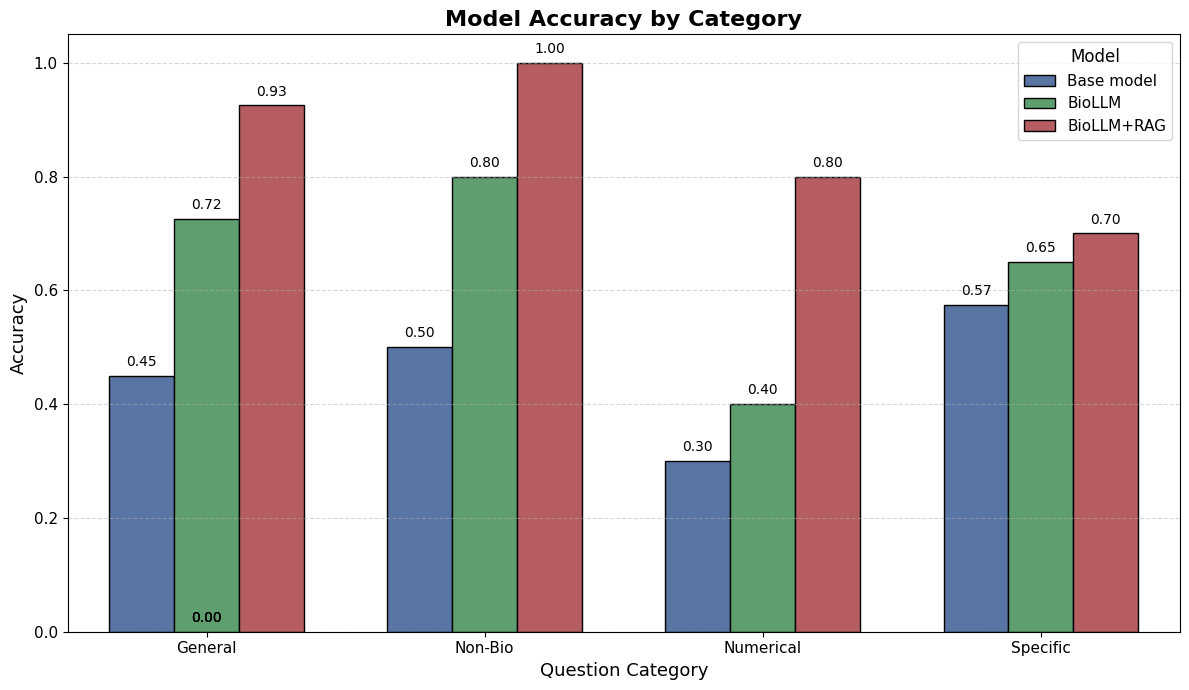

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy per category and model
acc_df = (
    all_df.groupby(['model', 'category'])['is_correct']
    .mean()
    .reset_index()
    .rename(columns={"is_correct": "accuracy"})
)

# Sort categories if needed (optional)
category_order = sorted(acc_df['category'].unique())

# Define custom color palette
palette = {
    "Base model": "#4c72b0",
    "BioLLM": "#55a868",
    "BioLLM+RAG": "#c44e52"
}

# Create the plot
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=acc_df,
    x="category",
    y="accuracy",
    hue="model",
    palette=palette,
    edgecolor="black",
    dodge=True,
    errwidth=1.5,
    width=0.7
)


for bar in barplot.patches:
    height = bar.get_height()
    barplot.annotate(
        f'{height:.2f}',
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title("Model Accuracy by Category", fontsize=16, fontweight='bold')
plt.xlabel("Question Category", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 1.05)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Model", title_fontsize=12, fontsize=11)
plt.tight_layout()
plt.show()


## Dataset #2

In [ ]:
d2_path = "/content/drive/MyDrive/datasets/advs7235-sup-0002-suppmat.csv"

d2 = pd.read_csv(d2_path, index_col=False)
d2.head()

,Unnamed: 0.1,Unnamed: 0,question,answer
0,0,0,What methods can be used to assess the adsorpt...,The adsorption of enzymes onto graphite electr...
1,1,1,How do the complexities of bolaamphiphiles' fu...,The functionalities present in bolaamphiphiles...
2,2,2,What methods were used to examine the composit...,The morphology of the composite materials was ...
3,3,3,"How do sacrificial bonds heal bone, and what i...","Sure, I can provide a succinct summary of the ..."
4,4,4,What are the limitations of using micro-comput...,Micro-computed tomography (mCT) is a powerful ...


In [ ]:
d2.tail(150)

,Unnamed: 0.1,Unnamed: 0,question,answer
22132,2664,2664,What are the nonlinear rheological material fu...,"* Lissajous-Bowditch projections, which provid..."
22133,2665,2665,What are the distinct surface features of the ...,The micro/nano-3D group exhibited distinct sur...
22134,2666,2666,What are the recent developments in the replic...,Recent developments in replicating tough bio-c...
22135,2667,2667,What is the relationship between the fractal d...,The fractal dimension of the fat crystal net p...
22136,2668,2668,What are the displacement components of a ripp...,The displacement components of a rippled graph...
...,...,...,...,...
22277,2809,2809,What are the differences in the viscoelastic b...,In large amplitude oscillatory shear (LAOS) te...
22278,2810,2810,How do hierarchical structures control the int...,"Protein materials, such as those found in cell..."
22279,2811,2811,What is the expected linear dependence of the ...,The FFEA simulations of the dynein stalk and l...
22280,2812,2812,What are the different approaches to mimicking...,Mimicking the hierarchical bone structure in s...


In [ ]:
d2['question'][0]

'What methods can be used to assess the adsorption of enzymes onto graphite electrodes, and how can the activities of immobilized laccase be evaluated?'

In [ ]:
d2['answer'][0]

'The adsorption of enzymes onto graphite electrodes can be assessed using techniques such as FTIR, which provide information about the immobilized enzyme and can be compared to that of free enzyme. The activities of immobilized laccase can be evaluated using ABTS as the reaction substrate, and one activity unit is defined as the amount of enzyme required to catalyze 1 lmol of substrate per minute. The reaction process can be monitored by measuring the increase in absorbance at 420 nm using a UV-vis spectrophotometer. Additionally, the laccase-immobilized graphite electrode biofuel cell can be studied using cyclic voltammetry with a potentiostat, which has been conducted for similar modified carbons intended for fuel cell applications.'

In [ ]:
print(len(d2))
print(len(d2.columns))
print(d2.columns)

22282
4
Index(['Unnamed: 0.1', 'Unnamed: 0', 'question', 'answer'], dtype='object')


In [ ]:
d2.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'question', 'answer'], dtype='object')

We don't need columns ['Unnamed: 0.1', 'Unnamed: 0'], so drop them.

In [ ]:
d2 = d2.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [ ]:
d2.isnull().sum()

,0
question,2
answer,0


Let's drop the rows with null

In [ ]:
d2_cleaned = d2.dropna(subset=['question', 'answer'])

# Verify the rows were dropped
print(d2_cleaned.isnull().sum())


print(len(d2_cleaned))
print(len(d2_cleaned.columns))
print(d2_cleaned.columns)

question    0
answer      0
dtype: int64
22280
2
Index(['question', 'answer'], dtype='object')


In [ ]:
# Tokenize questions into word arrays (split by space)
d2_cleaned['tokenized_question'] = d2_cleaned['question'].apply(lambda x: x.split())

# Find identical arrays (questions that have the same tokenized form)
duplicate_questions = d2_cleaned[d2_cleaned.duplicated(subset=['tokenized_question'], keep=False)]

# Display the duplicate questions (those with identical tokenized arrays)
print(duplicate_questions[['question', 'tokenized_question']])


                                                question  \
150    What is the optimal aspect ratio of reinforcem...   
374    What are the limitations of 3D-printing that n...   
737    What are the mechanical properties of mother o...   
805    What are the key challenges in creating larger...   
886    How can new and sophisticated characterization...   
...                                                  ...   
22008  What are the key challenges in manufacturing h...   
22078  What are the mechanical properties of snake an...   
22118  What are the key factors that contribute to th...   
22200  What are the fundamental principles that gover...   
22210  What is the relation between pitch angle and t...   

                                      tokenized_question  
150    [What, is, the, optimal, aspect, ratio, of, re...  
374    [What, are, the, limitations, of, 3D-printing,...  
737    [What, are, the, mechanical, properties, of, m...  
805    [What, are, the, key, challenges, in

<ipython-input-65-9da574f9849f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_cleaned['tokenized_question'] = d2_cleaned['question'].apply(lambda x: x.split())


In [ ]:
len(duplicate_questions)

235

In [ ]:
# Tokenize the questions into word arrays and convert to tuples for grouping
d2_cleaned['tokenized_question'] = d2_cleaned['question'].apply(lambda x: tuple(x.split()))

# Group by the tokenized_question column (now a tuple)
grouped = d2_cleaned.groupby('tokenized_question')
k=0
# Iterate over groups with more than one entry and print the duplicate pairs
for tokens, group in grouped:
    if len(group) > 1:
        k += len(group)
        print("Matching tokenized question:", tokens)
        print(group[['question']])
        print("-----"*5)
print(k)

<ipython-input-67-88b92997b0fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_cleaned['tokenized_question'] = d2_cleaned['question'].apply(lambda x: tuple(x.split()))


Matching tokenized question: ('1?',)
      question
15354       1?
20220       1?
-------------------------
Matching tokenized question: ('Does', 'the', 'presence', 'of', 'visible', 'mineral', 'in', 'the', 'SEM', 'images', 'of', 'the', '"inside"', 'membrane', 'samples', 'confirm', 'that', 'mineral', 'can', 'form', 'in', 'an', 'environment', 'that', 'physically', 'excludes', 'the', 'polymer', 'from', 'interacting', 'with', 'the', 'matrix?')
                                                question
15234  Does the presence of visible mineral in the SE...
17617  Does the presence of visible mineral in the SE...
-------------------------
Matching tokenized question: ('How', 'can', 'new', 'and', 'sophisticated', 'characterization', 'techniques,', 'including', 'nanotechnology', 'and', 'novel', 'biofabrication', 'methods,', 'provide', 'informative', 'insights', 'about', 'the', 'structure-function', 'relationship', 'of', 'cartilage', 'from', 'its', 'macro', 'to', 'nanostructure?')
             

In [ ]:
d2_filtered = d2_cleaned.drop_duplicates(subset=['tokenized_question']).reset_index(drop=True)

duplicates = d2_filtered[d2_filtered.duplicated(subset=['tokenized_question'], keep=False)]
len(duplicates)

0

In [ ]:
print(d2_filtered.shape)
d2_filtered.head()

(22159, 3)


,question,answer,tokenized_question
0,What methods can be used to assess the adsorpt...,The adsorption of enzymes onto graphite electr...,"(What, methods, can, be, used, to, assess, the..."
1,How do the complexities of bolaamphiphiles' fu...,The functionalities present in bolaamphiphiles...,"(How, do, the, complexities, of, bolaamphiphil..."
2,What methods were used to examine the composit...,The morphology of the composite materials was ...,"(What, methods, were, used, to, examine, the, ..."
3,"How do sacrificial bonds heal bone, and what i...","Sure, I can provide a succinct summary of the ...","(How, do, sacrificial, bonds, heal, bone,, and..."
4,What are the limitations of using micro-comput...,Micro-computed tomography (mCT) is a powerful ...,"(What, are, the, limitations, of, using, micro..."


In [ ]:
d2_filtered.dropna(subset=['question', 'answer'], inplace=True)
d2_filtered.shape

(22159, 3)

In [ ]:
qa_df = d2_filtered.copy()

qa_df['question_length'] = qa_df['question'].astype(str).apply(lambda x: len(x.split()))
qa_df['answer_length'] = qa_df['answer'].apply(lambda x: len(x.split()))

qa_df.head()

,question,answer,tokenized_question,question_length,answer_length
0,What methods can be used to assess the adsorpt...,The adsorption of enzymes onto graphite electr...,"(What, methods, can, be, used, to, assess, the...",24,113
1,How do the complexities of bolaamphiphiles' fu...,The functionalities present in bolaamphiphiles...,"(How, do, the, complexities, of, bolaamphiphil...",20,154
2,What methods were used to examine the composit...,The morphology of the composite materials was ...,"(What, methods, were, used, to, examine, the, ...",10,99
3,"How do sacrificial bonds heal bone, and what i...","Sure, I can provide a succinct summary of the ...","(How, do, sacrificial, bonds, heal, bone,, and...",20,344
4,What are the limitations of using micro-comput...,Micro-computed tomography (mCT) is a powerful ...,"(What, are, the, limitations, of, using, micro...",31,265


In [ ]:
avg_question_length = np.mean(qa_df['question_length'])
avg_answer_length = np.mean(qa_df['answer_length'])

print(f"Average Question Length: {avg_question_length:.2f} words")
print(f"Average Answer Length: {avg_answer_length:.2f} words")

Average Question Length: 26.23 words
Average Answer Length: 165.41 words


In [ ]:
qa_df['question'] = qa_df['question'].str.lower().str.strip()
qa_df['answer'] = qa_df['answer'].str.lower().str.strip()

qa_df.head()

,question,answer,tokenized_question,question_length,answer_length
0,what methods can be used to assess the adsorpt...,the adsorption of enzymes onto graphite electr...,"(What, methods, can, be, used, to, assess, the...",24,113
1,how do the complexities of bolaamphiphiles' fu...,the functionalities present in bolaamphiphiles...,"(How, do, the, complexities, of, bolaamphiphil...",20,154
2,what methods were used to examine the composit...,the morphology of the composite materials was ...,"(What, methods, were, used, to, examine, the, ...",10,99
3,"how do sacrificial bonds heal bone, and what i...","sure, i can provide a succinct summary of the ...","(How, do, sacrificial, bonds, heal, bone,, and...",20,344
4,what are the limitations of using micro-comput...,micro-computed tomography (mct) is a powerful ...,"(What, are, the, limitations, of, using, micro...",31,265


In [ ]:
qa_df = qa_df.drop(columns=['tokenized_question', 'question_length', 'answer_length'])
qa_df.head()

,question,answer
0,what methods can be used to assess the adsorpt...,the adsorption of enzymes onto graphite electr...
1,how do the complexities of bolaamphiphiles' fu...,the functionalities present in bolaamphiphiles...
2,what methods were used to examine the composit...,the morphology of the composite materials was ...
3,"how do sacrificial bonds heal bone, and what i...","sure, i can provide a succinct summary of the ..."
4,what are the limitations of using micro-comput...,micro-computed tomography (mct) is a powerful ...


In [ ]:
import unicodedata
import re

def normalize_text(text):
    text = unicodedata.normalize("NFKC", text)  # Normalize Unicode
    text = text.lower().strip()  # Convert to lowercase
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    return text


In [ ]:
print(normalize_text(qa_df['question'][0]))
print(normalize_text(qa_df['answer'][0]))

qa_df = qa_df.applymap(normalize_text)
qa_df.head()

what methods can be used to assess the adsorption of enzymes onto graphite electrodes, and how can the activities of immobilized laccase be evaluated?
the adsorption of enzymes onto graphite electrodes can be assessed using techniques such as ftir, which provide information about the immobilized enzyme and can be compared to that of free enzyme. the activities of immobilized laccase can be evaluated using abts as the reaction substrate, and one activity unit is defined as the amount of enzyme required to catalyze 1 lmol of substrate per minute. the reaction process can be monitored by measuring the increase in absorbance at 420 nm using a uv-vis spectrophotometer. additionally, the laccase-immobilized graphite electrode biofuel cell can be studied using cyclic voltammetry with a potentiostat, which has been conducted for similar modified carbons intended for fuel cell applications.


<ipython-input-76-c79d772063e0>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  qa_df = qa_df.applymap(normalize_text)


,question,answer
0,what methods can be used to assess the adsorpt...,the adsorption of enzymes onto graphite electr...
1,how do the complexities of bolaamphiphiles' fu...,the functionalities present in bolaamphiphiles...
2,what methods were used to examine the composit...,the morphology of the composite materials was ...
3,"how do sacrificial bonds heal bone, and what i...","sure, i can provide a succinct summary of the ..."
4,what are the limitations of using micro-comput...,micro-computed tomography (mct) is a powerful ...


### Save as JSONL for LLM Fine-Tuning

In [ ]:
import json

# Save as JSONL (each line is a JSON object)
with open("qa_dataset.jsonl", "w") as f:
    for _, row in qa_df.iterrows():
        json.dump({"question": row["question"], "answer": row["answer"]}, f)
        f.write("\n")  # Add newline to separate each JSON object


### Let's count TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


vectorizer = TfidfVectorizer(stop_words='english')
corpus = d2_filtered['question'].tolist()

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)


# Get the mapping of tokens to feature indices
feature_names = vectorizer.get_feature_names_out()
first_question_tfidf = pd.DataFrame(tfidf_matrix[0].T.todense(),
                                    index=feature_names,
                                    columns=["TF-IDF"])
print(first_question_tfidf.sort_values("TF-IDF", ascending=False))


               TF-IDF
laccase      0.412207
graphite     0.362114
immobilized  0.362114
enzymes      0.327461
activities   0.323991
...               ...
epdms        0.000000
epd          0.000000
epc          0.000000
ep3          0.000000
epicuticle   0.000000

[17373 rows x 1 columns]


In [ ]:
import json
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet

# Download if not already
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('stopwords')

# POS tag mapping function
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

word_counter = Counter()

with open("qa_dataset.jsonl", "r") as f:
    for line in f:
        data = json.loads(line)
        question = data["question"].lower()
        tokens = word_tokenize(question)
        tagged = pos_tag(tokens)

        lemmatized = [
            lemmatizer.lemmatize(word, get_wordnet_pos(tag))
            for word, tag in tagged if word.isalpha() and word not in stop_words
        ]

        word_counter.update(lemmatized)

print(word_counter.most_common(20))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('property', 5378), ('material', 5335), ('use', 4959), ('mechanical', 4082), ('structure', 3465), ('method', 2574), ('bone', 2399), ('tissue', 2070), ('contribute', 1911), ('different', 1850), ('composite', 1821), ('compare', 1821), ('affect', 1786), ('factor', 1785), ('study', 1666), ('surface', 1643), ('biological', 1556), ('application', 1534), ('hierarchical', 1509), ('effect', 1452)]


In [ ]:
import pandas as pd
qa_word_counter_df = pd.DataFrame(word_counter.most_common(20), columns=['Word', 'Frequency'])
qa_word_counter_df

,Word,Frequency
0,property,5378
1,material,5335
2,use,4959
3,mechanical,4082
4,structure,3465
5,method,2574
6,bone,2399
7,tissue,2070
8,contribute,1911
9,different,1850


In [ ]:
from wordcloud import WordCloud

# Create a dictionary with words as keys and their TF-IDF scores as values
words_tfidf = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).A1))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_tfidf)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# # Convert the TF-IDF matrix to a dense format and create a DataFrame
# tfidf_df = pd.DataFrame(tfidf_matrix.todense(), columns=feature_names)

# # Now, you can get a DataFrame of every token's TF-IDF score
# # For example, to see the tokens and their corresponding TF-IDF values for the entire corpus:
# tokens_tfidf = tfidf_df.stack().reset_index(name='TF-IDF')
# tokens_tfidf.columns = ['Document', 'Token', 'TF-IDF']
# tokens_tfidf.to_csv('tokens_tfidf.csv', index=False)

In [ ]:

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Dataset #3

In [ ]:
import pandas as pd
import numpy as np

d3_path = "/content/drive/MyDrive/datasets/advs7235-sup-0003-suppmat.csv"

d3 = pd.read_csv(d3_path)
d3.head()

,Citation,Question,Answer,Category
0,10.1002/adma.201502403,"When describing gradient structures, they can ...",C,General
1,10.1002/adma.201901561,What is the structure found in many crustacean...,B,General
2,10.1016/j.pmatsci.2007.06.001,What is scanning electron microscopy used for?...,A,General
3,10.1016/j.jbiomech.2004.09.027,What is Micro-CT used for? A) To see internal...,A,General
4,10.1016/j.jbiomech.2004.09.027,Which is true about cellulose microfibrils? A)...,A,General


In [ ]:
print(d3.shape)
print(d3.columns)

(100, 4)
Index(['Citation', 'Question', 'Answer', 'Category'], dtype='object')


In [ ]:
d3.describe()

,Citation,Question,Answer,Category
count,90,100,100,100
unique,21,100,3,4
top,10.1016/j.pmatsci.2007.05.002,"When describing gradient structures, they can ...",A,General
freq,26,1,58,40


In [ ]:
d3 = d3.drop(columns=['Citation'])
d3.head(2)

,Question,Answer,Category
0,"When describing gradient structures, they can ...",C,General
1,What is the structure found in many crustacean...,B,General


In [ ]:
d3_duplicates = d3[d3.duplicated(subset=['Question'], keep=False)]
d3_duplicates.count()

,0
Question,0
Answer,0
Category,0


In [ ]:
d3.shape

(100, 3)

In [ ]:
mc_df = d3.copy()

mc_df['Question_length'] = mc_df['Question'].astype(str).apply(lambda x: len(x.split()))

mc_df.head()

,Question,Answer,Category,Question_length
0,"When describing gradient structures, they can ...",C,General,18
1,What is the structure found in many crustacean...,B,General,14
2,What is scanning electron microscopy used for?...,A,General,26
3,What is Micro-CT used for? A) To see internal...,A,General,30
4,Which is true about cellulose microfibrils? A)...,A,General,24


In [ ]:
question_avg_length = np.mean(mc_df['Question_length'])

print(f"Average Question Length: {question_avg_length:.2f} words")

Average Question Length: 21.95 words


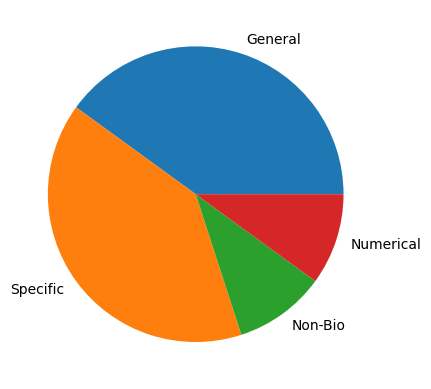

In [ ]:
import matplotlib.pyplot as plt


category_counts = mc_df['Category'].value_counts().astype(int)

# Get the labels corresponding to the counts
labels = category_counts.index.tolist()  # Use the index for labels

# Plot the pie chart
plt.pie(category_counts.values, labels=labels)  # Pass values and labels separately
plt.show()

In [ ]:
mc_df.dropna(subset=['Question', 'Answer'], inplace=True)
mc_df = mc_df.drop(columns='Question_length')
mc_df.head()

,Question,Answer,Category
0,"When describing gradient structures, they can ...",C,General
1,What is the structure found in many crustacean...,B,General
2,What is scanning electron microscopy used for?...,A,General
3,What is Micro-CT used for? A) To see internal...,A,General
4,Which is true about cellulose microfibrils? A)...,A,General


### Normalize text

In [ ]:
print(normalize_text(mc_df['Question'][0]))
print(normalize_text(mc_df['Answer'][0]))

mc_df = mc_df.applymap(normalize_text)
mc_df.head()

when describing gradient structures, they can be gradients in? a) dimension b) composition c) both dimension and composition
c


<ipython-input-26-02f933882722>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mc_df = mc_df.applymap(normalize_text)


,Question,Answer,Category
0,"when describing gradient structures, they can ...",c,general
1,what is the structure found in many crustacean...,b,general
2,what is scanning electron microscopy used for?...,a,general
3,what is micro-ct used for? a) to see internal ...,a,general
4,which is true about cellulose microfibrils? a)...,a,general


In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


vectorizer = TfidfVectorizer(stop_words='english')
corpus = mc_df['Question'].tolist()
tfidf_matrix = vectorizer.fit_transform(corpus)


feature_names = vectorizer.get_feature_names_out()
first_question_tfidf = pd.DataFrame(tfidf_matrix[0].T.todense(),
                                    index=feature_names,
                                    columns=["TF-IDF"])
print(first_question_tfidf.sort_values("TF-IDF", ascending=False))




                TF-IDF
composition   0.594316
dimension     0.594316
describing    0.297158
gradients     0.297158
structures    0.241838
...                ...
enamel        0.000000
elytra        0.000000
elliptical    0.000000
elephant      0.000000
exoskeletons  0.000000

[500 rows x 1 columns]


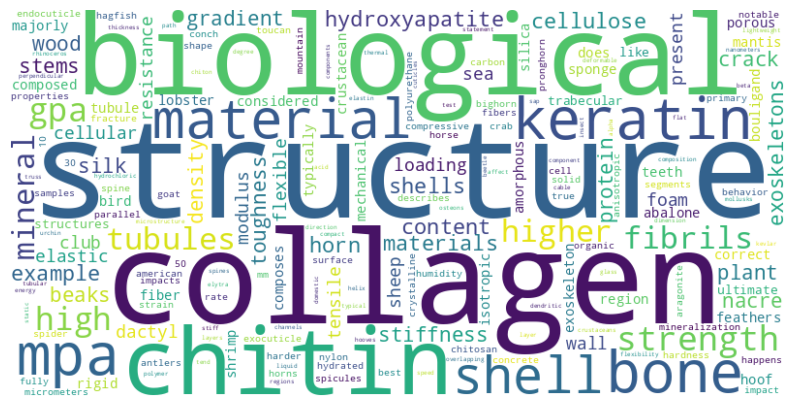

In [ ]:


# Create a dictionary with words as keys and their TF-IDF scores as values
words_tfidf = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).A1))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_tfidf)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
mc_df = mc_df.drop(columns='Question_length')
mc_df.head()

,Question,Answer,Category
0,"When describing gradient structures, they can ...",C,General
1,What is the structure found in many crustacean...,B,General
2,What is scanning electron microscopy used for?...,A,General
3,What is Micro-CT used for? A) To see internal...,A,General
4,Which is true about cellulose microfibrils? A)...,A,General


In [ ]:
import json

# Save as JSONL (each line is a JSON object)
with open("mc_dataset.jsonl", "w") as f:
    for _, row in mc_df.iterrows():
        json.dump({"question": row["Question"], "answer": row["Answer"], "category": row["Category"]}, f)
        f.write("\n")  # Add newline to separate each JSON object


In [ ]:
import json
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet

# Download if not already
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# POS tag mapping function
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
stop_words.add('a')
stop_words.add('b')
stop_words.add('c')
stop_words.add('d')

mc_word_counter = Counter()

with open("mc_dataset.jsonl", "r") as f:
    for line in f:
        data = json.loads(line)
        question = data["question"].lower()
        tokens = word_tokenize(question)
        tagged = pos_tag(tokens)

        lemmatized = [
            lemmatizer.lemmatize(word, get_wordnet_pos(tag))
            for word, tag in tagged if word.isalpha() and word not in stop_words
        ]

        mc_word_counter.update(lemmatized)

print(mc_word_counter.most_common(20))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('structure', 28), ('high', 28), ('material', 23), ('biological', 20), ('shell', 19), ('find', 17), ('collagen', 17), ('bone', 16), ('strength', 13), ('chitin', 13), ('keratin', 13), ('mineral', 13), ('content', 12), ('tubule', 12), ('mpa', 12), ('exoskeleton', 11), ('horn', 11), ('crack', 11), ('gradient', 10), ('beak', 10)]


In [ ]:
mc_word_counter_df = pd.DataFrame(mc_word_counter.most_common(20), columns=['Word', 'Frequency'])
mc_word_counter_df

,Word,Frequency
0,structure,28
1,high,28
2,material,23
3,biological,20
4,shell,19
5,find,17
6,collagen,17
7,bone,16
8,strength,13
9,chitin,13
